In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.transform as trs
%matplotlib inline
from tqdm import tqdm


In [63]:
class ImageData :     
    def __init__(self,img, dat = {}):
        self.lowImage = trs.resize(img,(256,256))
        self.image = img
        self.data = dict(dat)
    def add_data(self,name,value):
        self.data[name]=value
    def available_data(self):
        return list(self.data.keys())
    def delete_data(self, name):
        self.data.pop(name)
    def plot_Image(self):
        plt.imshow(self.image)
    def plot_lowImage(self):
        plt.imshow(self.lowImage)
    def __repr__(self):
        return self.__str__()
    def __str__(self):
        if('name' in self.available_data()):
            return self.data['name']           #WHat do I print, lowresImage or the name?
        else :
            return "UnnamedImage"
        

In [74]:
class ImageDataCollection : 

# Constructors
    def __init__(self,imagedatas):
        self.images = imagedatas
    @classmethod    
    def from_array(cls,imageArray):
        imgdata_list = []
        for elem in imageArray:
            imagedata = ImageData(elem)
            imgdata_list.append(imagedata)
        return cls(imgdata_list)
    
# Addition, Deletion
    def add(self,imagedata):
        if(type(imagedata) != ImageData):
            raise ValueError('Invalid Argument, imagedata should be of type ImageData')
        self.images.append(imagedata)
    def delete(self,imagedata):
        self.images.remove(imagedata)

# Features from ImageData       
    def extract_lowRes(self):
        result = []
        for elem in self.images:
            result.append(elem.lowImage)
        return result
    def extract_highRes(self):
        result = []
        for elem in self.images:
            result.append(elem.image)
        return result
    def images_with_data(self,data):
        result = []
        for elem in self.images:
            available = elem.available_data()
            if(data in available):
                result.append(elem)
        return result
       
# Indexing, assignement and deletion
    def __getitem__(self,index):
        return self.images[index]
    def __setitem__(self,index,value):
        if(type(value) != ImageData):
            raise ValueError('Invalid Argument, imagedata should be of type ImageData')
        self.images[index] = value
    def __delitem__(self,index):
        return self.images.pop(index)
    
    

# Test image data

In [11]:

image = ImageData(np.zeros((1000,1000)))

In [15]:
type(image) == ImageData

True

In [19]:
image.add_data("entropy",0)

In [24]:
image.data.keys()

dict_keys(['entropy'])

In [11]:
image1 = ImageData(np.zeros((5,5,3))*183)

In [12]:
image1.data

{}

In [6]:
liste = [1,2,3,6]
liste.pop(1)
liste

[1, 3, 6]

In [14]:
image1.add_data("hue",2)
image1.add_data("entropy",2)
image1.add_data("sat",2)
image1.add_data("val",2)


In [12]:
image1.available_data()

['ent']

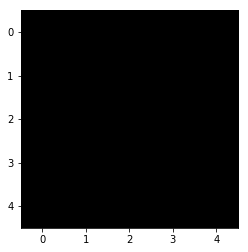

In [16]:
image1.plot_Image()

In [17]:
image1.delete_data("sat")

KeyError: 'sat'

# Test Collection

In [65]:
image1 = ImageData(np.ones((1000,1000,3))*(1,0,0))
image2 = ImageData(np.ones((1000,1000,3))*(0,1,0))
image3 = ImageData(np.ones((1000,1000,3))*(0,0,1))

image1.add_data('ent',1)
image2.add_data('ent',2)


In [5]:
liste = [image1,image2,image3]
mycollection = ImageDataCollection(liste)

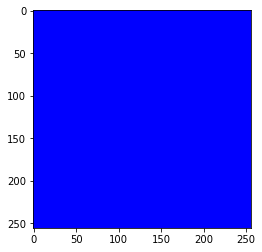

In [9]:
imagesLowRes = mycollection.extract_lowRes()
plt.imshow(imagesLowRes[2]);

In [8]:
withent= mycollection.images_with_data('ent')

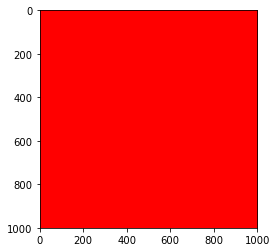

In [11]:
withent[0].plot_Image()

In [13]:
mycollection.add(image3)

In [14]:
mycollection.add('dummy thing')

ValueError: Invalid Argument, imagedata should be of type ImageData

In [15]:
mycollection.delete(image3)

In [66]:
arr = [np.ones((1000,1000,3))*(1,0,0),np.ones((1000,1000,3))*(0,1,0),np.ones((1000,1000,3))*(0,0,1)]
collection = ImageDataCollection.from_array(arr)

In [67]:
collection[0] = image1

In [68]:
collection[0] = 'image1'

ValueError: Invalid Argument, imagedata should be of type ImageData

In [69]:
print(collection[0])

UnnamedImage


In [70]:
collection[0]

UnnamedImage

In [72]:
collection[0].add_data('name','BestImage in the world')
collection[0]

BestImage in the world